In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
from io import BytesIO
from six.moves import urllib
from tensorflow.keras.applications import inception_v3, InceptionV3
tf.__version__

'1.9.0'

## Inception V3 architecture to predict ImageNet classes

In [3]:
model = InceptionV3(weights='imagenet', include_top=True)

In [4]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
conv2d_1 (

In [5]:
k = model.get_layer("input_1")
k.input

<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [6]:
img = plt.imread("Images/french-horn.jpg")
img.shape

(144, 150, 3)

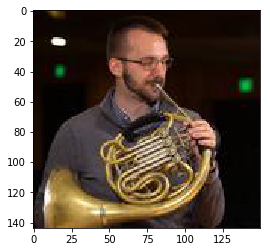

In [7]:
plt.imshow(img)

In [8]:
pimg = inception_v3.preprocess_input(np.expand_dims(img.astype(float), axis=0))
print np.min(img), np.max(img)
print np.min(pimg), np.max(pimg)

0 255
-1.0 1.0


### predict and decode

In [9]:
pred = model.predict(pimg)
pred.shape

(1, 1000)

In [10]:
print "highest probabilities", np.sort(pred[0])[::-1][:10]
print "highest class codes  ", np.argsort(pred[0])[::-1][:10]

highest probabilities [1.0000000e+00 4.2835346e-19 6.7436453e-21 5.6142698e-22 2.5852486e-22
 2.2225789e-22 1.8277135e-22 7.2189886e-23 4.4466076e-23 3.7975859e-23]
highest class codes   [566 432 683  57 262 687 767  10 123  70]


In [11]:
from tensorflow.keras.applications.inception_v3 import decode_predictions

print 'Predicted:', decode_predictions(pred, top=5)


Predicted: [[(u'n03394916', u'French_horn', 1.0), (u'n02804610', u'bassoon', 4.2835346e-19), (u'n03838899', u'oboe', 6.7436453e-21), (u'n01735189', u'garter_snake', 5.61427e-22), (u'n02112706', u'Brabancon_griffon', 2.5852486e-22)]]


### occlusion at random

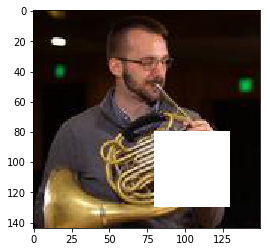

In [20]:
oimg = img.copy()
w,h=50,50
bx,by = np.random.randint(img.shape[1]-w), np.random.randint(img.shape[0]-h)
#bx,by=80,80
#bx,by=20,90
oimg[by:by+h,bx:bx+w]=np.max(oimg)
p = oimg[by:by+h,bx:bx+w,:]
plt.imshow(oimg)

observe how prediction probabilities change when occlusion happens on the key object. Try also the following:

- bx=80 and by=80
- bx=20 and by=90 

what part of the instrument is more responsible for the CNN classification?

In [21]:
pimg = inception_v3.preprocess_input(np.expand_dims(oimg.astype(float), axis=0))
pred = model.predict(pimg)
print 'Predicted:', decode_predictions(pred, top=5)

Predicted: [[(u'n02672831', u'accordion', 1.0), (u'n01677366', u'common_iguana', 1.700162e-15), (u'n04141076', u'sax', 2.536374e-17), (u'n02804610', u'bassoon', 1.5953617e-18), (u'n03249569', u'drum', 3.2179111e-21)]]
